## Análise de vendas Dotcel

## Importando bibliotecas

In [1]:
!pip install seaborn
import seaborn as sns
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import numpy as np

## Importando dados

In [2]:
dotcel = pd.read_csv('dados/dotcel.csv')
dotcel

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17
...,...,...
56,2018-11-26,10773.53
57,2018-11-27,22984.56
58,2018-11-28,9216.26
59,2018-11-29,12147.61


In [3]:
# Mudando o nome das colunas por questão de estética

nomes_col = {
    'dia' : 'Dia',
    'vendas' : 'Vendas'
}

dotcel = dotcel.rename(columns = nomes_col)
dotcel

,Dia,Vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17
...,...,...
56,2018-11-26,10773.53
57,2018-11-27,22984.56
58,2018-11-28,9216.26
59,2018-11-29,12147.61


In [4]:
print(f'A quantidade de linhas e colunas é: {dotcel.shape}')
print(f'A quatidade de dados nulos é: {dotcel.isna().sum().sum()}')

A quantidade de linhas e colunas é: (61, 2)
A quatidade de dados nulos é: 0


In [5]:
dotcel.dtypes

Dia        object
Vendas    float64
dtype: object

In [6]:
# Convertendo a coluna Dia de string para data

dotcel['Dia'] = pd.to_datetime(dotcel['Dia'])
dotcel.dtypes

Dia       datetime64[ns]
Vendas           float64
dtype: object

In [7]:
# Analisando o aumento de vendas e a aceleração

dotcel['Aumento'] = dotcel['Vendas'].diff()
dotcel['Aceleração'] = dotcel['Aumento'].diff()
dotcel

,Dia,Vendas,Aumento,Aceleração
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51
...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84
57,2018-11-27,22984.56,12211.03,13937.49
58,2018-11-28,9216.26,-13768.30,-25979.33
59,2018-11-29,12147.61,2931.35,16699.65


In [8]:
# Criando uma função para a plotagem onde serão usadas as variáveis das seguintes colunas: Dia, Vendas, Aumento e Aceleração
# Análise de vendas, aumento de vendas e aceleração de vendas conforme os dias de Outubro e Novembro de 2018
    
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    plt.figure(figsize = (16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize = 16, x = 0.25, y = 1)
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data = dataset)
    ax = ax

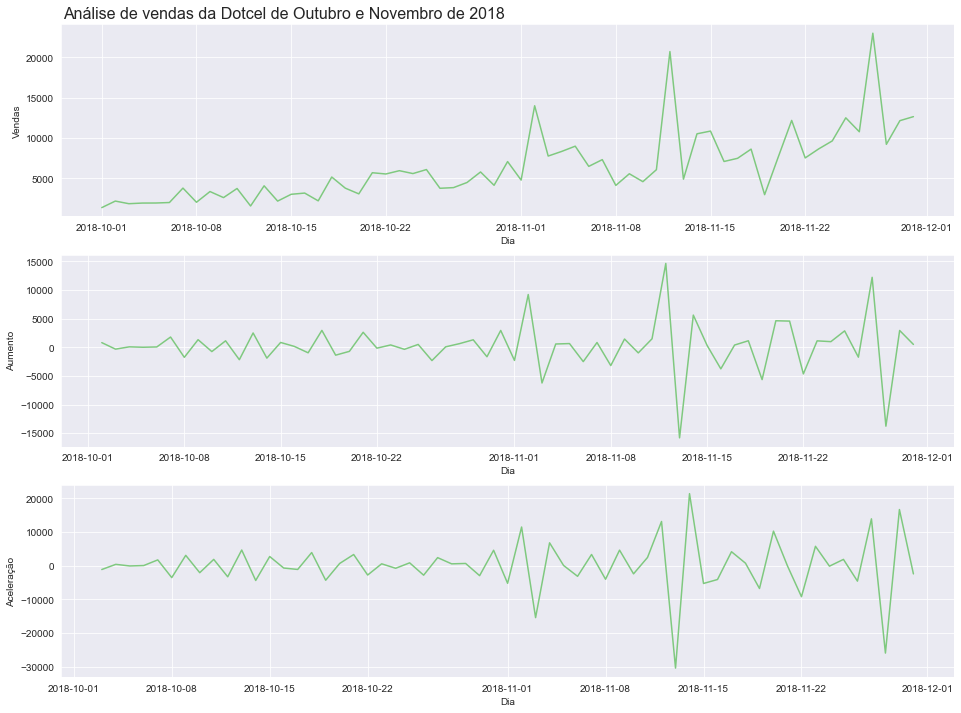

In [9]:
plot_comparacao('Dia', 'Vendas', 'Aumento',
               'Aceleração', dotcel, 'Análise de vendas da Dotcel de Outubro e Novembro de 2018')

**Muitos ruídos nos gráficos. A ideia é normalizar através da média móvel.**

## Normalizando os ruídos através da média móvel

In [18]:
dotcel['Média_móvel'] = dotcel['Vendas'].rolling(7).mean()

In [29]:
dotcel.head(7)

,Dia,Vendas,Aumento,Aceleração,Média_móvel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


In [20]:
def plotar(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x = x, y = y, data = dataset)
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

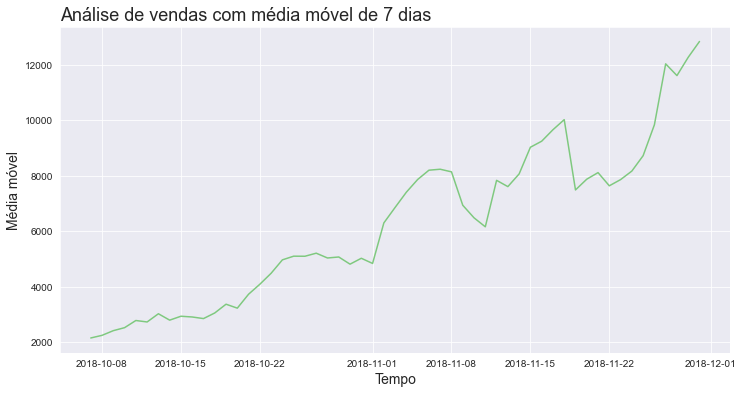

In [21]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo',
      'Média móvel', 'Dia', 'Média_móvel', dotcel)

In [30]:
dotcel['media_movel_21'] = dotcel['Vendas'].rolling(21).mean()

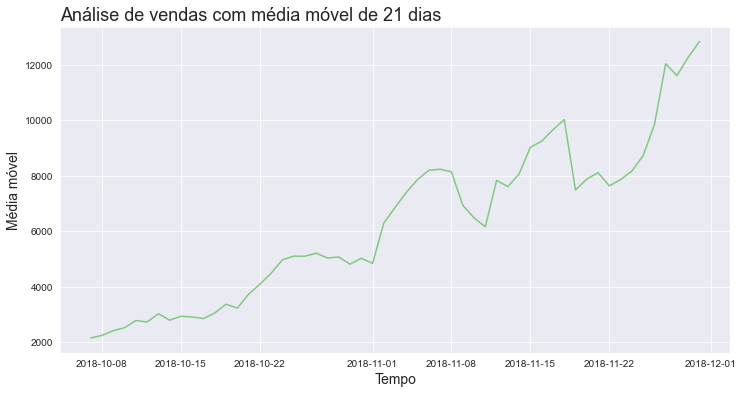

In [31]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo',
      'Média móvel', 'Dia', 'Média_móvel', dotcel)

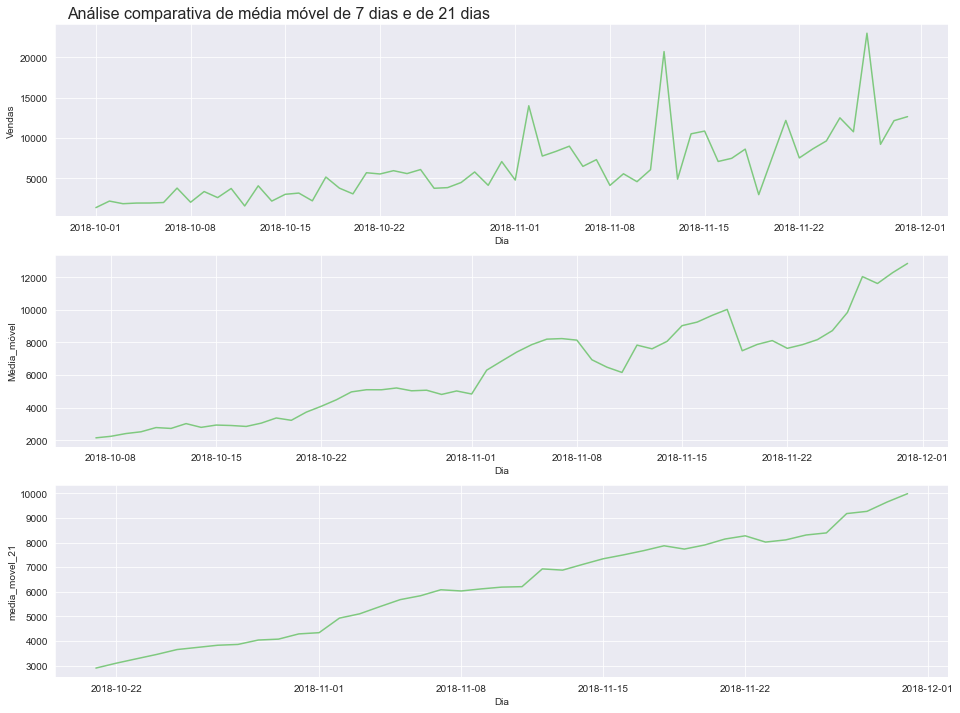

In [32]:
plot_comparacao('Dia', 'Vendas', 'Média_móvel', 'media_movel_21',
               dotcel, 'Análise comparativa de média móvel de 7 dias e de 21 dias')